<a href="https://colab.research.google.com/github/Zactyz/AI-Repo/blob/master/HW_2/REVISION_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REVISED Problem 2 - Zachary Zimmerman

###Extend gradient to case n=2

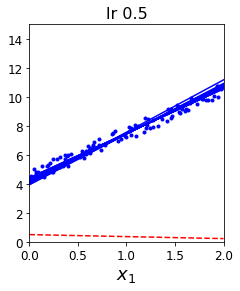

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

y_predict = X_new_b.dot(weight)
y_predict

def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.show()

##3D

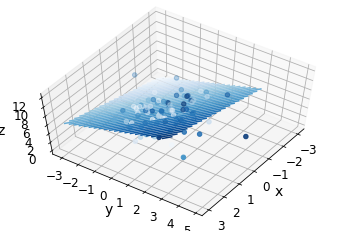

In [3]:
from mpl_toolkits import mplot3d
%matplotlib inline

def f(x, y):
    return x ** 2 + y ** 2 - 3

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

def f(x, y):
    return (x - 3) + (y - 3) + 4

Z = f(X, Y)

ax.contour3D(X, Y, Z + 8, 40, cmap='Blues')

ax.view_init(60, 35)

zdata = np.random.random(100) + 6
xdata = -zdata + 7 - 1 * np.random.randn(100)
ydata = zdata - 6 + 1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');